In [3]:
import numpy as np, matplotlib.pyplot as plt
from astropy.io import ascii as asc

FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
CUTOFF_SIGMA = 4.0

In [4]:
def whitaker_2014():
    '''
    Plots the log(M*)-log(SFR) relation from Whitaker+14 in red.
    '''
    xmin = 8.4
    xmax = 11.2
    xarr1 = np.arange(xmin, 10.2+0.01, 0.01)
    xarr2 = np.arange(10.2, xmax+0.01, 0.01)

    plt.plot(xarr1, 0.94 * (xarr1 - 10.2) + 1.11, 'r--')
    whitaker, = plt.plot(xarr2, 0.14 * (xarr2 - 10.2) + 1.11, 'r--',
                         label='Whitaker+14 (0.5<z<1.0)', zorder=6)
    return whitaker


def delosreyes_2015():
    '''
    Plots the z~0.8 data points from de Los Reyes+15 in cyan.
    '''
    xarr = np.array([9.27, 9.52, 9.76, 10.01, 10.29, 10.59, 10.81, 11.15])
    yarr = np.array([0.06, 0.27, 0.43, 0.83, 1.05, 1.18, 1.50, 1.54])
    yerr = np.array([0.454, 0.313, 0.373, 0.329, 0.419, 0.379, 0.337, 0.424])

    plt.errorbar(xarr, yarr, yerr, fmt='c', ecolor='c', zorder=2) 
    delosreyes = plt.scatter(xarr, yarr, color='c', marker='s',
                             label='de los Reyes+15 (z~0.8)', zorder=2)
    return delosreyes


def salim_2007():
    '''
    Plots the log(M*)-log(SFR) relation from Salim+07 in black.
    '''
    xmin = 8.5
    xmax = 11.2

    xarr = np.arange(xmin, xmax+0.01, 0.01)
    salim, = plt.plot(xarr, (-0.35 * (xarr - 10.0) - 9.83) + xarr, 'k-',
                      label='Salim+07 (z~0)', zorder=5)
    return salim


def berg_2012():
    '''
    Plots the log(M*)-log(SFR) relation from Berg+12 in green. (ASCII file
    provided by Chun Ly)
    '''
    berg = asc.read(FULL_PATH+'Main_Sequence/Berg2012_table.clean.txt',guess=False,
                    Reader=asc.CommentedHeader,delimiter='\t')
    berg_stlr = np.array(berg['log(M*)'])
    berg_sfr  = np.log10(np.array(berg['SFR']))

    berg = plt.scatter(berg_stlr, berg_sfr, color='g', marker='x',
                        label='Berg+12 (z<0.01)', zorder=4)
    return berg


def noeske_2007():
    '''
    Plots the data points from Noeske+07 in orange. (ASCII file provided by
    Chun Ly)
    '''
    noeske = asc.read(FULL_PATH+'Main_Sequence/Noeske07_fig1_z1.txt',guess=False,
                      Reader=asc.NoHeader)
    logM   = np.array(noeske['col1'])
    logSFR = np.array(noeske['col2'])
    logSFR_low  = np.array(noeske['col3'])
    logSFR_high = np.array(noeske['col4'])

    plt.plot(logM, logSFR_low, color='orange', marker='', linestyle='',
             zorder=1)
    plt.plot(logM, logSFR_high, color='orange', marker='', linestyle='',
             zorder=1)
    plt.fill_between(logM, logSFR_low, logSFR_high, facecolor='none',
                     hatch=3*'.', edgecolor='orange', linewidth=0.0,
                     zorder=1)
    noeske, = plt.plot(logM, logSFR, color='orange', marker='+',
                       linestyle='', label='Noeske+07 (0.20<z<0.40)',
                       zorder=1)
    return noeske


def sSFR_lines(f, ax, xlim):
    '''
    Creates the three dotted sSFR^-1 lines: 1, 10, and 100 Gyr
    '''
    xmin = min(xlim)
    xmax = max(xlim)
    xarr = np.arange(xmin, xmax, 0.01)
    ax.plot(xarr, xarr - 9, 'k:',zorder=8)#, alpha=.6)
    ax.text(5.3, -2.9, 'sSFR=(1.0 Gyr)'+r'$^{-1}$', rotation=42, color='k',
             alpha=1, fontsize=10)
    ax.plot(xarr, xarr - 10, 'k:')#, alpha=.5)
    ax.text(6.3, -2.8, 'sSFR=(10.0 Gyr)'+r'$^{-1}$', rotation=42, color='k',
             alpha=1, fontsize=10)
    ax.plot(xarr, xarr - 11, 'k:')#, alpha=.5)
    ax.text(7.3, -2.7, 'sSFR=(100.0 Gyr)'+r'$^{-1}$', rotation=42, color='k',
             alpha=1, fontsize=10)

In [5]:
def modify_graph(f, ax, labelarr, xlim, ylim, title):
    '''
    Modifies the graph (gives it limits, labels, a title, etc.)
    
    Low mass sources are overlaid with a '+' by calling lowmass().
    
    Information from previous literature is plotted by calling the various
    methods above (usually named after primary author_year).

    Two legends are created - one for the shapes and one for the different
    literature/data points. Then minor ticks were added.
    '''
#     print labelarr[0].text
    legend1 = ax.legend(handles=list(labelarr[1:]), loc='upper left', frameon=False,
                         fontsize=12, scatterpoints=1, numpoints=1)
    legend1.get_texts()[0].set_text('z~0.07,0.08 (NB704,NB711)')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(r'$\log_{10}(M_*/M_\odot)$', fontsize=12)
    ax.set_ylabel('log(SFR[H'+r'$\alpha$'+']/M'+r'$_{\odot}$'+' yr'+r'$^{-1}$'+')', fontsize=12)
#     ax.set_title(title)
    
    noeske = noeske_2007()
    delosreyes = delosreyes_2015()
    whitaker = whitaker_2014()
    salim = salim_2007()
    berg = berg_2012()
    
    labelarr2 = np.array([whitaker, delosreyes, noeske, salim, berg])
    legend2 = ax.legend(handles=list(labelarr2), loc='lower right', frameon=False,
                         fontsize=12, scatterpoints=1, numpoints=1)
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    ax.minorticks_on()
    f.tight_layout()

    sSFR_lines(f, ax, xlim)


def make_all_graph(stlr_mass, sfr, filtarr, markarr, z_arr, title,
    no_spectra, yes_spectra, filts, good_sig_iis):
    '''
    '''
    color='blue'
    xlim = [4, 11]
    ylim = [-4, 2]

    f, ax = plt.subplots()
    plt.gcf().set_size_inches(10, 8)

    labelarr = np.array([])
    for (ff, mark, avg_z) in zip(filtarr, markarr, z_arr):
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


        temp = plt.scatter(stlr_mass[yes_spectra][filt_index_y],
                           sfr[yes_spectra][filt_index_y], marker=mark,
                           facecolors=color, edgecolors='none', alpha=0.3,
                           zorder=3, label='z~'+np.str(avg_z)+' ('+ff+')', s=40)
        plt.scatter(stlr_mass[no_spectra][filt_index_n], 
                    sfr[no_spectra][filt_index_n],
                    marker=mark, facecolors='none', edgecolors=color, alpha=0.3, 
                    linewidth=0.5, zorder=3, label='z~'+np.str(avg_z)+' ('+ff+')', s=40)
        
        labelarr = np.append(labelarr, temp)
    #endfor

    modify_graph(f, ax, labelarr, xlim, ylim, title)
    plt.show()
#     plt.savefig(FULL_PATH+'Plots/main_sequence/'+title+'.pdf')
#     plt.close()

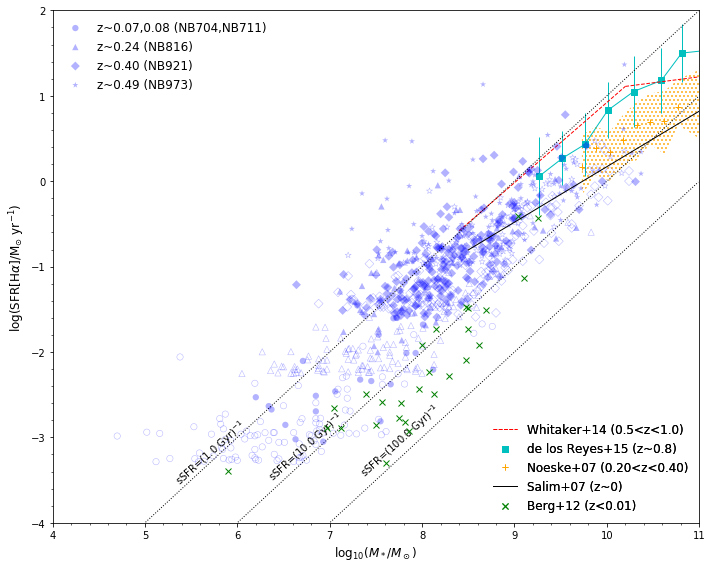

In [6]:
# reading in data generated by EBV_corrections.py
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                Reader=asc.FixedWidthTwoLine)
zspec0 = np.array(corr_tbl['zspec0'])
no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

stlr_mass = np.array(corr_tbl['stlr_mass'])
filts = np.array(corr_tbl['filt'])
obs_sfr = np.array(corr_tbl['obs_sfr'])
dust_corr_factor = np.array(corr_tbl['dust_corr_factor'])
filt_corr_factor = np.array(corr_tbl['filt_corr_factor'])
nii_ha_corr_factor = np.array(corr_tbl['nii_ha_corr_factor'])


# defining useful data structs for plotting
filtarr = np.array(['NB704', 'NB711', 'NB816', 'NB921', 'NB973'])
markarr = np.array(['o', 'o', '^', 'D', '*'])

# defining an approximate redshift array for plot visualization
z_arr0 = np.array([7046.0, 7111.0, 8150.0, 9196.0, 9755.0])/6563.0 - 1
z_arr0 = np.around(z_arr0, 2)
z_arr  = np.array(z_arr0, dtype='|S4')
z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])

# defining a flux sigma cutoff
good_sig_iis = np.where(corr_tbl['flux_sigma'] >= CUTOFF_SIGMA)[0]

title = 'mainseq_filt_nii_dust_corrs'
corrs = filt_corr_factor+nii_ha_corr_factor+dust_corr_factor

make_all_graph(stlr_mass, obs_sfr+corrs, filtarr, markarr, z_arr, title, 
               no_spectra, yes_spectra, filts, good_sig_iis)

## line of best fit

In [7]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b

xarr = stlr_mass[good_sig_iis]
yarr = obs_sfr[good_sig_iis]+corrs[good_sig_iis]

coeffs, covar = curve_fit(line, xarr, yarr)
coeffs
xx = np.linspace(min(xarr), max(xarr), len(xarr))

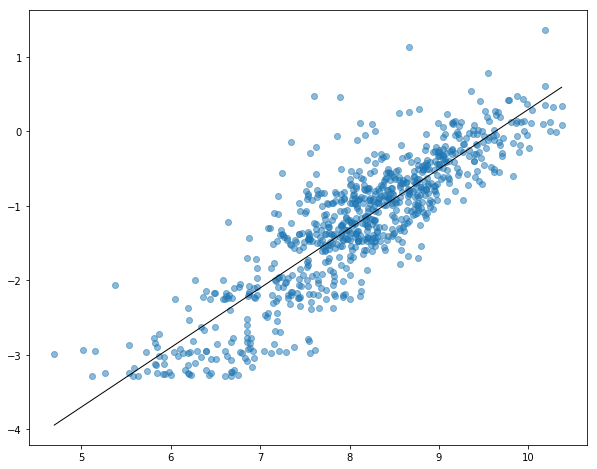

In [8]:
plt.plot(xarr, yarr, 'o', alpha=0.5)
plt.plot(xx, line(xx, *coeffs), 'k')
plt.gcf().set_size_inches(10,8)

In [46]:
import matplotlib as mpl

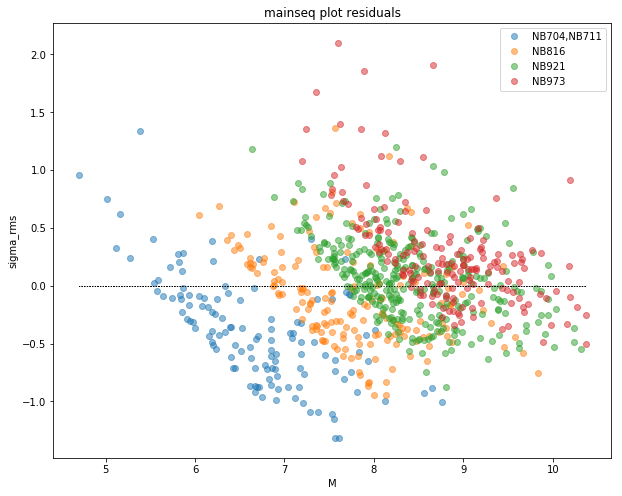

In [68]:
# have this in diff colors per filter?
filts99 = filts[good_sig_iis]
cwheel = [np.array(mpl.rcParams['axes.prop_cycle'])[x]['color'] for x in range(4)]

yresids = yarr - line(xarr, *coeffs)

for ff,cc,ll in zip(['NB7', 'NB816', 'NB921', 'NB973'], cwheel, ['NB704,NB711', 'NB816', 'NB921', 'NB973']):
    filt_match = np.array([x for x in range(len(filts99)) if ff in filts99[x]])
    plt.plot(xarr[filt_match], yresids[filt_match], 'o', color=cc, alpha=0.5, label=ll)

plt.plot(xarr, np.zeros(len(xarr)), 'k:')
plt.xlabel('M')
plt.ylabel('sigma_rms')
plt.legend(loc='best')
plt.title('mainseq plot residuals')
plt.gcf().set_size_inches(10,8)